# CASE CHURN 

Analise o dataset de churn de uma Telecom que está disponível nesse [link](https://www.kaggle.com/blastchar/telco-customer-churn)

Para esse dataset verifique:
*  Existe NA nas variáveis? Quantos?
*  Como você faria para encontrar o perfil do cliente que faz churn?
*  Qual seria as características do cliente fidelizado? Caracterize os dois perfis usando variáveis sociais e os serviços contratados.
* Leia a documentação do jointplot do seaborn e crie uma visualização usando as variáveis **tenure** e **MonthlyCharges** para os casos que Churn==Yes e Churn==No
*  Que sugestões voce poderia sugerir para diminuir o churn?

## Importando Dataset


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Cursos /01. Digital House/0_BasicoPython/Case Churn - Data Viz/WA_Fn-UseC_-Telco-Customer-Churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


## Dimensões, NaN, dtype

In [ ]:
df.shape

(7043, 21)

In [ ]:
# Contagem de NULL/ missing
df.isnull().sum()

# Não temos nulos na nossa base.

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [ ]:
# Valores únicos para todas as colunas
for column in df:
  print(column)
  print(df[column].unique())

customerID
['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
gender
['Female' 'Male']
SeniorCitizen
[0 1]
Partner
['Yes' 'No']
Dependents
['No' 'Yes']
tenure
[ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]
PhoneService
['No' 'Yes']
MultipleLines
['No phone service' 'No' 'Yes']
InternetService
['DSL' 'Fiber optic' 'No']
OnlineSecurity
['No' 'Yes' 'No internet service']
OnlineBackup
['Yes' 'No' 'No internet service']
DeviceProtection
['No' 'Yes' 'No internet service']
TechSupport
['No' 'Yes' 'No internet service']
StreamingTV
['No' 'Yes' 'No internet service']
StreamingMovies
['No' 'Yes' 'No internet service']
Contract
['Month-to-month' 'One year' 'Two year']
PaperlessBilling
['Yes' 'No']
PaymentMethod
['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (a

In [ ]:
# Acredito que o único que deva ser modificado é o TotalCharges para float
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')


##Verificando Duplicadas

In [ ]:
df['customerID'].duplicated().sum()

0

## Análises com PIVOT TABLE
 

In [ ]:
#Features numéricas
df_num = pd.pivot_table(df,index=('Churn'))
df_num

,MonthlyCharges,SeniorCitizen,TotalCharges,tenure
Churn,,,,
No,61.265124,0.128721,2555.344141,37.569965
Yes,74.441332,0.254682,1531.796094,17.979133


In [ ]:
#Features Categóricas
df_cat = df.dtypes[df.dtypes=='object'].index
#para cada coluna (c) em todas as colunas categoricas (cols_cat)
for coluna in df_cat:
  print(pd.pivot_table(df,index=('Churn',coluna),aggfunc='count'))
#print a contagem de todas elas entre elas, fixando o Churn.

                  Contract  Dependents  ...  gender  tenure
Churn customerID                        ...                
No    0002-ORFBO         1           1  ...       1       1
      0003-MKNFE         1           1  ...       1       1
      0013-MHZWF         1           1  ...       1       1
      0013-SMEOE         1           1  ...       1       1
      0014-BMAQU         1           1  ...       1       1
...                    ...         ...  ...     ...     ...
Yes   9961-JBNMK         1           1  ...       1       1
      9965-YOKZB         1           1  ...       1       1
      9985-MWVIX         1           1  ...       1       1
      9986-BONCE         1           1  ...       1       1
      9992-RRAMN         1           1  ...       1       1

[7043 rows x 19 columns]
              Contract  Dependents  ...  customerID  tenure
Churn gender                        ...                    
No    Female      2549        2549  ...        2549    2549
      Male    

- Neste caso onde deseja-se fazer uma visualização geral, o entendimento do output do pivot_table é mais difícil que a opção de plots apresentada nas cálulas a seguir.

## FOR loop

- SHAREY = False ( cada gráfico vai ter um y que melhor se adequa, caso contrario é o mesmo y pra todos)

- O "Customer Id não é importante , então podemos dropar essa coluna para fazer uma outra análise

In [ ]:
 df.drop('customerID',axis=1,inplace=True)

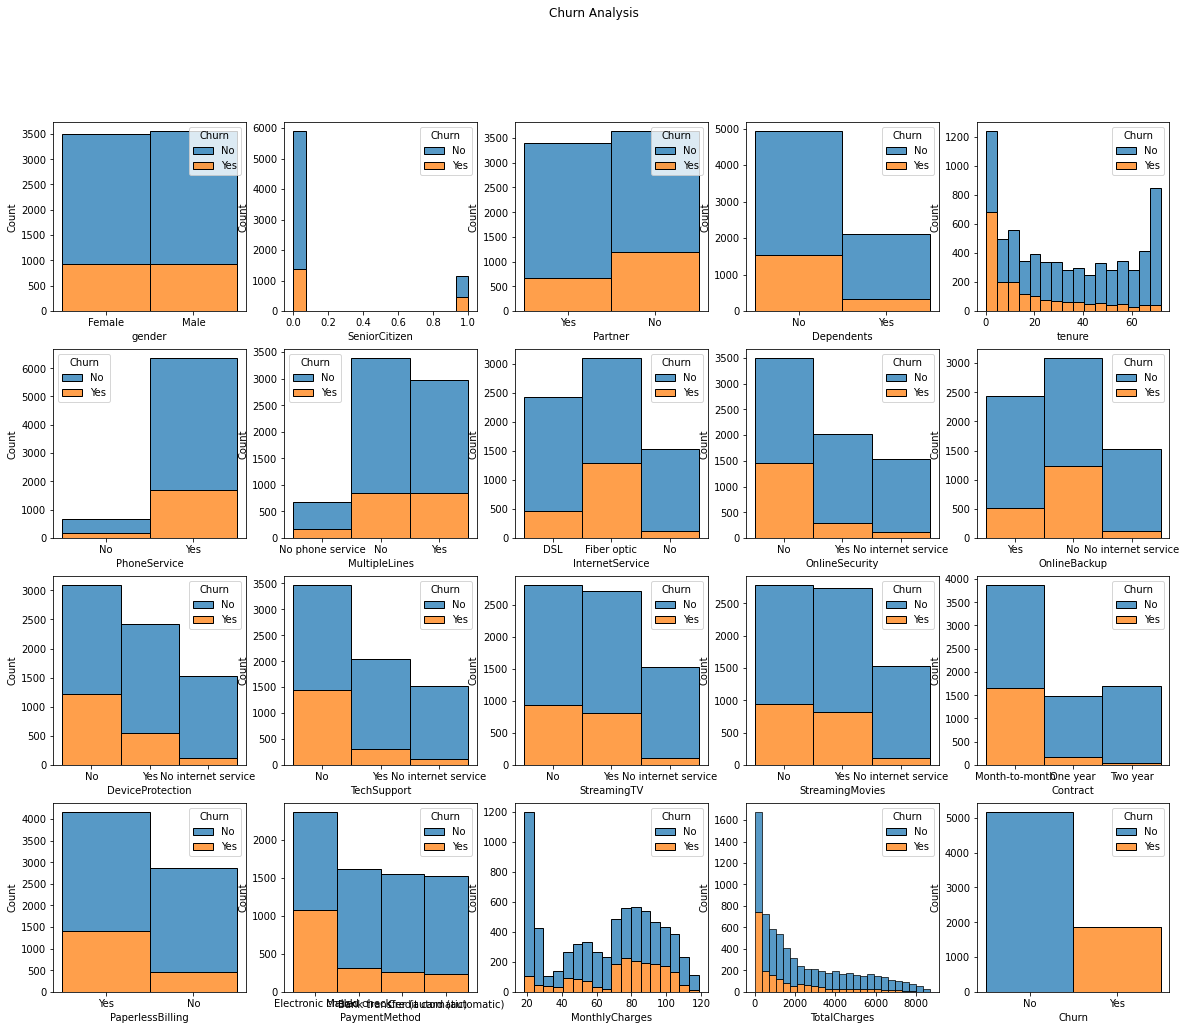

In [ ]:
columns = df.columns
fig, axes = plt.subplots(4, 5, figsize=(20, 16),sharey=False)
fig.suptitle('Churn Analysis')

feature=0
for row in range(0,4):
  for col in range(0,5):
    sns.histplot(ax=axes[row, col], data=df, x=columns[feature], hue="Churn", multiple="stack")
    feature += 1

## 1ª Análise 

CHURN == YES
- GENDER: Feminino 
- PARTNER: Sem parceiros
- DEPENDENTS: Sem dependentes
- TENURE : Menor que 20 meses
- PHONE SERVICE: Com serviço de telefone 
- INTERNET SERVICE: com serviço de internet
- CONTRACT: COntrato Mensal 
- PAPERBIILING : Contas em papel 
- MONTHLY CHARGE: Superior a 70

### Analisar o perfil do Churn == YES

In [ ]:
df_churn= df.loc[df['Churn'] == "Yes"]
df_churn.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,Female,0,No,No,8,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.50,Yes
8,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
13,Male,0,No,No,49,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.30,Yes


In [ ]:
df_churn.shape

(1869, 20)

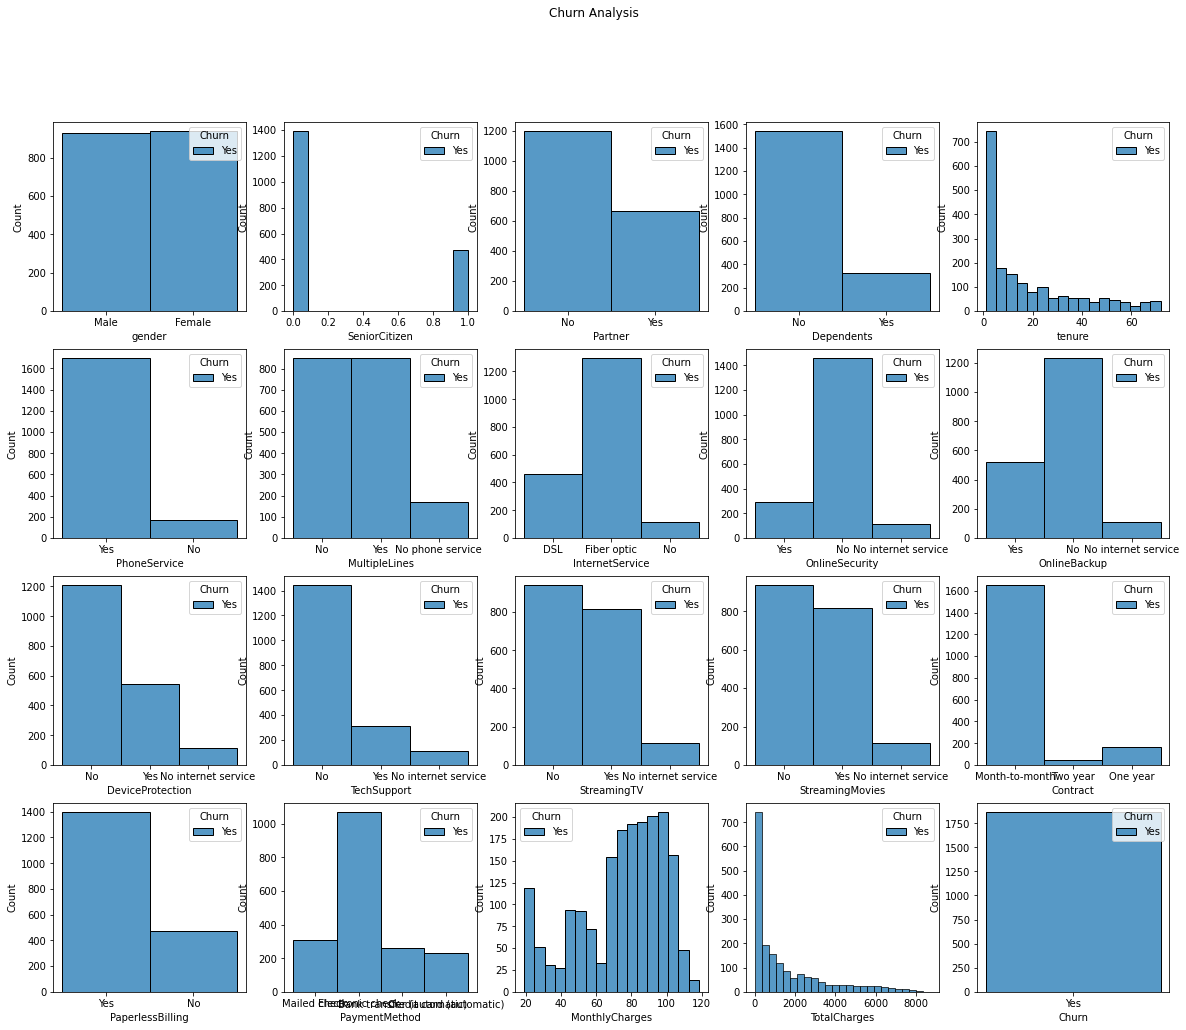

In [ ]:
columns = df_churn.columns
fig, axes = plt.subplots(4, 5, figsize=(20, 16),sharey=False)
fig.suptitle('Churn Analysis')

feature=0
for row in range(0,4):
  for col in range(0,5):
    sns.histplot(ax=axes[row, col], data=df_churn, x=columns[feature], hue="Churn", multiple="stack")
    feature += 1

## 2ª Análise

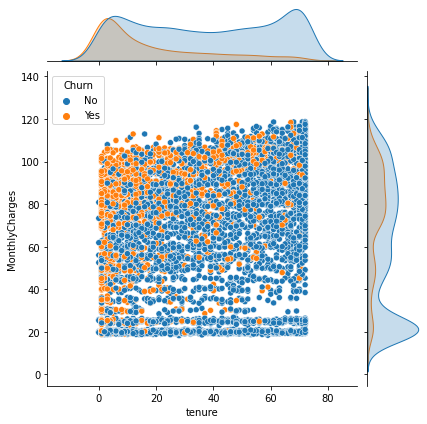

In [ ]:
sns.jointplot(data=df, y="MonthlyCharges",x="tenure",hue='Churn')

No gráfico acima é possível identificar claramente que: 
* clientes com tenure < 20 possuem maior chance de Churn
* clientes com MonthlyCharges > 70 também possuem maior chance de Churn

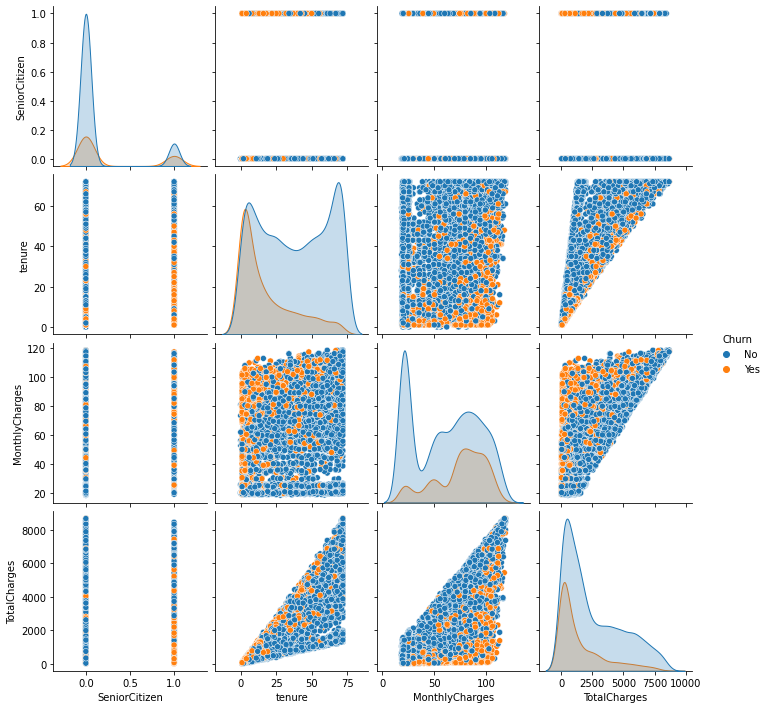

In [ ]:
sns.pairplot(df, hue= 'Churn')
plt.show()

## Recomendações para minimizar o Churn:


* Personalizar os pacotes de acordo com o que os clientes realmente usam, pois clientes com muitos serviços contratados e mensalidades maiores demonstram maior possibilidade de Churn. Neste caso a operadora recebe mais por menos tempo. A longo prazo esta condição é desfavorável

* Clientes com Partner ou Dependentes apresentam menor chance de dar Churn
